<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools</div>
<div style="text-align: right">21 October 2019, with material from Damir Cavar and Juan H. Klopper</div>

# Introduction to Games

Let's see how linear algebra helps us play games *better*.


## Vandermonde matrices

A [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix) (also [here](http://mathworld.wolfram.com/VandermondeMatrix.html)) is a matrix whose columns are **functions evaluated at discrete points**.

The main property of a square Vandermonde matrix is that its [determinant](https://en.wikipedia.org/wiki/Determinant) has a simple form. The determinant of a mtrix helps you find out if the $n$ by $n$ matrix is ill-conditioned, or not (has $n$ distrinct eigenvectors).

A matrix is often used to represent the coefficients in a system of linear equations, and the determinant can be used to solve those equations. In linear algebra, a matrix is invertible if and only if its determinant is non-zero, and correspondingly the matrix is singular if and only if its determinant is zero. This leads to the use of determinants in defining the [characteristic polynomial](https://en.wikipedia.org/wiki/Characteristic_polynomial) of a matrix, whose roots are the eigenvalues. 

The characteristic polynomial of a **graph** is the characteristic polynomial of its adjacency matrix. If you work at facebook, or linked in, you know *all* about that.

50
shape = (50, 4)


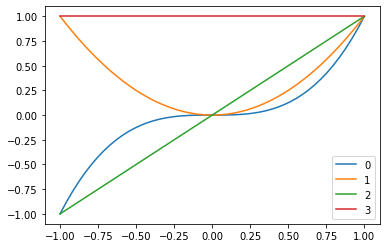

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-1,1)
print(len(x))
A = np.array([x**3, x**2, x, 1 + 0*x]).T
print('shape =', A.shape)  # This is a tall matrix with 4 columns

lines = plt.plot(x, A)
plt.legend(lines, range(4))
plt.ylim((-1.1,1.1));

This type of matrix is *very common*. We can also create it with `numpy.vander`.

We can evaluate polynomials using matrix-vector multiplication in a very compact form. For example,

$$ 5x^3 - 3x = \Bigg[ x^3 \Bigg|\, x^2 \Bigg|\, x \,\Bigg|\, 1 \Bigg] \begin{bmatrix}5 \\ 0 \\ -3 \\ 0 \end{bmatrix} . $$

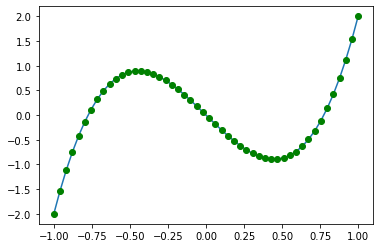

In [5]:
p = np.array([5,0,-3,0])
A = np.array([x**3, x**2, x, 1+0*x]).T
plt.plot(x, A@p) #or A.dot(p)
plt.plot(x, np.polyval(p, x), 'go');

Now suppose we know the value of a polynomial at a few points. We can use the Vandermonde matrix to find a polynomial *going through those points*. This is called **exact** polynomial regression. Not *statistical polynomial regression*, which finds the *best fit* polynomial.

[ 9.5207102  -1.39354067 -8.64530561  3.26894526]
B = [[-1.     1.    -1.     1.   ]
 [ 0.001  0.01   0.1    1.   ]
 [ 0.343  0.49   0.7    1.   ]
 [ 0.729  0.81   0.9    1.   ]] 
p = [ 9.5207102  -1.39354067 -8.64530561  3.26894526]


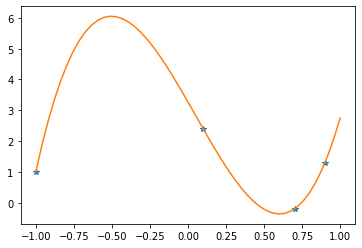

In [6]:
x1 = np.array([-1, 0.1, 0.7, 0.9])  # points where we know values
y = np.array([1, 2.4, -0.2, 1.3])     # values at those points

B = np.vander(x1)                     # Vandermonde matrix at the known points
p = np.linalg.solve(B, y)             # Compute the polynomial coefficients
print(p)

plt.plot(x1, y, '*')
plt.plot(x, A.dot(p))                 # Plot the polynomial evaluated at all points
print('B =', B, '\np =', p)

So $p(x) = 9.521 x^3 - 1.393 x^2 - 8.645 x + 3.269$ is the unique cubic polynomial that interpolates those points.
Applying $B^{-1}$ converts from the values at the marked points to the polynomial coefficients.

Wow, non-linear regression with matrices! But, does this work for any data points you set? Try it out..

<div style="text-align: right; color: gray">2</div>
## Cholesky decomposition and Imaginary numbers

In linear algebra, the `Cholesky decomposition` or `Cholesky factorization` is a decomposition of a [Hermitian](https://en.wikipedia.org/wiki/Hermitian_matrix)  or self-adjoint matrix, positive-definite matrix into the product of a lower triangular matrix and its conjugate transpose, which is useful for Monte Carlo simulations. 

A Hermitian matrix is a complex square matrix that is equal to its own conjugate transpose—that is, the element in the i-th row and j-th column is equal to the complex conjugate of the element in the j-th row and i-th column, for all indices i and j. What is a complex conjugate? 

Heck, what is a complex number? A [Complex number](https://en.wikipedia.org/wiki/Complex_number)  is a number that can be expressed in the form $a + bi$, where $a$ and $b$ are real numbers, and $i$ is a solution of the equation $x^2 = −1$. Because no *real* number satisfies this equation, $i$ is called an **imaginary number**. Didn't you have an imaginary friend as a kid? So why can't numbers have imaginary friends?

</br >
<center>
<img src="ipynb.images/spiritedaway.jpg" />
</center>



And what is a complex conjugate? The [Complex conjugate](https://en.wikipedia.org/wiki/Complex_conjugate) of a complex number is the number with an equal real part and an imaginary part equal in magnitude but **opposite in sign**. For example, the complex conjugate of $1 + 2i$ is $1 − 2i$. Complex conjugates are important for finding roots of polynomials. According to the complex conjugate root theorem, if a complex number is a root to a polynomial in one variable with real coefficients (such as the quadratic equation or the cubic equation), so is its conjugate. 

And why are Hermitian matrix cool? Because Charles Hermite demonstrated in 1855 that matrices of this form share a property with real symmetric matrices of always having *real* eigenvalues. *No imaginary ones*! He looks happy about this..


</br >
<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/5/55/Charles_Hermite_circa_1901_edit.jpg" width=200 />
    Charles Hermite
</center>


You may be familiar with the [$LU$](https://en.wikipedia.org/wiki/LU_decomposition) decomposition of matrices, which factors a matrix as the product of a `L`ower triangular matrix and an `U`pper triangular matrix. The $LU$ decomposition is a *key step* when inverting a matrix or computing the determinant of a matrix.

However, when applicable, the [Cholesky decomposition](https://en.wikipedia.org/wiki/Cholesky_decomposition) is *twice* as **efficient** as the LU decomposition for solving linear systems of equations. But it'also *twice* as **hard** to compute, since there's less degrees of freedom to play with. Here's an example of $LU$:

$$\begin{pmatrix} -9 &1  &-4 \\   6&0  &2 \\   3&0  &1  \end{pmatrix} = \begin{pmatrix} 2 &1 &-4 \\  0&0 &2 \\  0&0 &1  \end{pmatrix}  \begin{pmatrix} 1 &0  &0 \\   1&1  &0 \\   3&0  &1  \end{pmatrix}$$

The Cholesky decomposition of a Hermitian positive-definite matrix $A$ is a decomposition of the form

$${\displaystyle \mathbf {A} =\mathbf {LL} ^{*},} $$

where $L$ is a lower triangular matrix with real and positive diagonal entries, and $L^*$ denotes the conjugate transpose of $L$.

A closely related variant of the classical Cholesky decomposition is the `LDL decomposition`,

$${\displaystyle \mathbf {A} =\mathbf {LDL} ^{*},} \; {\displaystyle \mathbf {A} =\mathbf {LDL} ^{*},}$$

where $L$ is a lower unit triangular (unitriangular) matrix, and $D$ is a diagonal matrix. Here's an example of a Cholesky, followed by an LDL decomposition:


</br >
<center>
<img src="images/cholesky.png" width=500 />
</center>

With a change of variables, you can convert any normal distribution to a *standard* normal distribution? With a Cholesky decomposition, you can convert a mutlivariate normal distribution to a standard multivariate distribution (where means are zero and self-correlations are $= 1$).

And that's about all the math you need to know for linear algenra :-)

Now let's have *fun*.

<br />
<center>
<img src = images/Calvin_and_hobbes._teacher.gif width = 400 />
</center>
<br />

# Playing Monopoly

Who does not want to get rich? If you grew up in a capitalist country, you grew up playing [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game) and getting indoctrinated to the idea of striking it *rich*. Even in China today, getting rich is a very common [wish](https://www.chinahighlights.com/travelguide/festivals/chinese-new-year-greetings.htm) you utter in the new year. Funny how disonnant it strikes with more traditional communist values. That is because communism in China, as in other countries, has for some years overshadowed local culture, but thankfully now, culture is undergoing a rennaissance, thanks to [reforms](https://en.wikipedia.org/wiki/Chinese_economic_reform) started by [Deng Xiaoping](https://en.wikipedia.org/wiki/Deng_Xiaoping), first in agriculture, and subsequently in industry.

The funny part is that the [Fed](https://en.wikipedia.org/wiki/Federal_Reserve_System) has very explicit rules against monopolies, which it deems unfair and detrimental to the general population.

![](http://buckwolf.org/a.abcnews.com/images/Entertainment/ho_hop_go_050111_t.jpg)<center>[Rich Uncle Pennybags](https://en.wikipedia.org/wiki/Rich_Uncle_Pennybags)<br>1940&mdash; today
   
No question games are *state machines*, right? Is Monopoly a Markov chain? Is *chess* a Markov chain?

If the next position for any player only depends on the current position, it is a **Markov chain**.

In Monopoly, a player starts on the `GO` square and adds the scores on two 6-sided dice to determine the number of squares they advance in a clockwise direction. Without any further rules we would expect to visit each square, *eventually* with equal probability: 2.5% (40 squares in total, so $\frac{1}{40}$). However, landing on G2J (Go To Jail), CC (community chest), and CH (chance) changes this distribution.

<br />
<center>
<img src = images/monopoly-board.jpg width = 500 />
</center>
<br />

These are the symbols, below, for each square as represented above, with Community Chest (CC), Chance (CH) and Go to Jail (G2J) squares highlighted orange:
<br />
<br />


<div style="text-align:center;">
<table cellspacing="1" cellpadding="5" border="0" style="background-color:#333333;" align="center"><tr><td style="background-color:#ffffff;">GO</td>
<td style="background-color:#ffffff;">A1</td>
<td style="background-color:#ff6347;">CC1</td>
<td style="background-color:#ffffff;">A2</td>
<td style="background-color:#ffffff;">T1</td>
<td style="background-color:#ffffff;">R1</td>
<td style="background-color:#ffffff;">B1</td>
<td style="background-color:#ff6347;">CH1</td>
<td style="background-color:#ffffff;">B2</td>
<td style="background-color:#ffffff;">B3</td>
<td style="background-color:#ffffff;">JAIL</td>
</tr><tr><td style="background-color:#ffffff;">H2</td>
<td colspan="9"> </td>
<td style="background-color:#ffffff;">C1</td>
</tr><tr><td style="background-color:#ffffff;">T2</td>
<td colspan="9"> </td>
<td style="background-color:#ffffff;">U1</td>
</tr><tr><td style="background-color:#ffffff;">H1</td>
<td colspan="9"> </td>
<td style="background-color:#ffffff;">C2</td>
</tr><tr><td style="background-color:#ff6347;">CH3</td>
<td colspan="9"> </td>
<td style="background-color:#ffffff;">C3</td>
</tr><tr><td style="background-color:#ffffff;">R4</td>
<td colspan="9"> </td>
<td style="background-color:#ffffff;">R2</td>
</tr><tr><td style="background-color:#ffffff;">G3</td>
<td colspan="9"> </td>
<td style="background-color:#ffffff;">D1</td>
</tr><tr><td style="background-color:#ff6347;">CC3</td>
<td colspan="9"> </td>
<td style="background-color:#ff6347;">CC2</td>
</tr><tr><td style="background-color:#ffffff;">G2</td>
<td colspan="9"> </td>
<td style="background-color:#ffffff;">D2</td>
</tr><tr><td style="background-color:#ffffff;">G1</td>
<td colspan="9"> </td>
<td style="background-color:#ffffff;">D3</td>
</tr><tr><td style="background-color:#ff6347;">G2J</td>
<td style="background-color:#ffffff;">F3</td>
<td style="background-color:#ffffff;">U2</td>
<td style="background-color:#ffffff;">F2</td>
<td style="background-color:#ffffff;">F1</td>
<td style="background-color:#ffffff;">R3</td>
<td style="background-color:#ffffff;">E3</td>
<td style="background-color:#ffffff;">E2</td>
<td style="background-color:#ff6347;">CH2</td>
<td style="background-color:#ffffff;">E1</td>
<td style="background-color:#ffffff;">FP</td>
</tr></table></div>

<br />

In addition to G2J, and one card from each of CC and CH that orders the player to go directly to jail, if a player rolls three consecutive doubles, they do not advance the result of their 3rd roll. Instead they proceed directly to jail! Too much luck can be a bad thing (when you roll a double, you get to roll again). But we won't model this rule because it invalidates our Markovian assumption.

At the beginning of the game, the CC and CH cards are shuffled. When a player lands on CC or CH, they take a card from the top of the respective pile and, after following the instructions, it is returned to the bottom of the pile. There are sixteen (16) cards in each pile, but for the purpose of this problem we are only concerned with cards that order a movement. Any instruction not concerned with movement will be ignored and the player will remain on the CC/CH square.

    Community Chest (2/16 cards):
        Advance to GO
        Go to JAIL
        
    Chance (10/16 cards):
        Advance to GO
        Go to JAIL
        Go to C1
        Go to E3
        Go to H2
        Go to R1
        Go to next R (railway company)
        Go to next R (railway company)
        Go to next U (utility company)
        Go back 3 squares.


We need to take into account die rolls, chance and community chest cards, and going to jail (from the "go to jail" space, from a card, or from rolling doubles three times in a row). We do not need, for now, to take into account anything about buying or selling properties or exchanging money or winning or losing the game, because these don't change a player's location. But we will take into account the value of each square by looking at the price to buy it, and the rent you can charge if any other player lands on it. 

All players start the game with an equal amount of money. Obviously, a good strategy for the game is to buy as many high-rent / low-priced properties as possible, right? Also, we will assume that a player in jail will always pay to get out of jail immediately. 

A game of Monopoly can go on *forever*, so the sample space in time (a ticker of all possible trajectories through the squares, in time) is *infinite*. Even if we limit the sample space to say, 1000 rolls, there are $21^{1000}$ such sequences of rolls (1-1, 1-2, 1-3, 1-4, 1-5, 1-6, 2-2, 2-3, 2-4, 2-5, 2-6, 3-3, 3-4, 3-5, 3-6, 4-4, 4-5, 4-6, 5-5, 5-6, 6-6, and even more possibilities when we consider drawing cards). So it is infeasible to explicitly represent that sample space. 

But it is fairly straightforward to implement a simulation and run it for, say, 400,000 rolls (so the average square will be landed on 10,000 times).

Moreover, we *can* represent the sample space of all possible positions per player, *at any moment in time*, since there are only 40 squares. We say that the state space for each player has 40 dimensions. Since each player changes state (position on the board) with a die roll, the game of Monopoly is essentially a 40-state **state machine**.

Monopoly is a *memoryless* game (the next position for any player only depends on the current position and the die roll), so a **Markov chain**. All theorems about Markov chains apply. Specifically, there is a **unique fixed point in state space**, and it is the *long-term behavior* of the game. In other words, if you play the game with an infinite anount of die rolls, there is a specific square you will land on *an infinite amount of times*. Figuring out that square is the holy grail of Monopoly game strategy. But also the strategy of any other Markovian game, and there are *many* such games in las Vegas casinos...

<br />
<center>
<img src = images/21.jpg width = 200 />
</center>
[21](https://www.imdb.com/title/tt0478087/)
<br />

Let's play.

### Monopoly Probability Density function

Let's compute the pdf of the Monopoly game, where the sample space consists of the 40 squares.

In [7]:
from collections import Counter, deque
import random

# The board: a list of the names of the 40 squares
# As specified by https://projecteuler.net/problem=84
board = """GO   A1 CC1 A2  T1 R1 B1  CH1 B2 B3
           JAIL C1 U1  C2  C3 R2 D1  CC2 D2 D3 
           FP   E1 CH2 E2  E3 R3 F1  F2  U2 F3 
           G2J  G1 G2  CC3 G3 R4 CH3 H1  T2 H2""".split()

def monopoly(steps):
    """Simulate given number of steps of Monopoly game, 
    yielding the number of the current square after each step."""
    goto(0) # start at GO
    CC_deck = Deck('GO JAIL' + 14 * ' ?')
    CH_deck = Deck('GO JAIL C1 E3 H2 R1 R R U -3' + 6 * ' ?')
    doubles = 0
    jail = board.index('JAIL')
    for _ in range(steps):
        d1, d2 = random.randint(1, 6), random.randint(1, 6) # roll die
        goto(here + d1 + d2)  # here is a global variable, so gets initialized to 0. It's modulo-40
        doubles = (doubles + 1) if (d1 == d2) else 0
        if doubles == 3 or board[here] == 'G2J':  
            goto(jail)
        elif board[here].startswith('CC'):
            do_card(CC_deck)
        elif board[here].startswith('CH'):
            do_card(CH_deck)
        yield here  # yield ensures monopoly() returns a list of positions. Also, allows to resume where we left off       

def goto(square):
    "Update the global variable 'here' to be square."
    global here
    here = square % len(board)
                   
def Deck(names):
    "Make a shuffled deck of cards, given a space-delimited string."
    cards = names.split()
    random.shuffle(cards)
    return deque(cards)    # double-ended queue, so can remove/add to the head or tail of the queue     

def do_card(deck):
    "Take the top card from deck and do what it says."
    global here
    card = deck[0]             # The top card
    deck.rotate(-1)            # Move top card to bottom of deck
    if card == 'R' or card == 'U': 
        while not board[here].startswith(card):
            goto(here + 1)     # Advance to next railroad or utility
    elif card == '-3':
        goto(here - 3)         # Go back 3 spaces
    elif card != '?':
        goto(board.index(card))# Go to destination named on card

Let's do 400000 die rolls:

In [8]:
results = list(monopoly(400000))

In [9]:
import pandas as pd
pd.DataFrame(results[0:100]).T

0   1   2   3   4   5   6   7   8   9  ...  90  91  92  93  94  95  96  97  \
0   6  12  25  28  33  39  15  19  25  32 ...  17  23  34   2  13  19  10  14   

   98  99  
0  23  31  

[1 rows x 100 columns]

And the pdf of our sample space by plotting a histogram of the squares (with a dotted red line at the average):

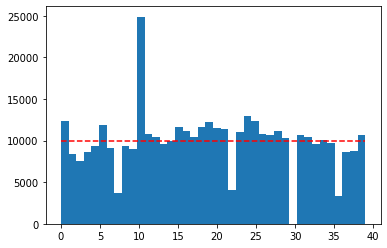

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt

plt.hist(results, bins=40)
avg = len(results) / 40
plt.plot([0, 39], [avg, avg], 'r--');

Boy, we **go to JAIL.. a lot**! More than double the average.

Also, we never land on space[30] == G2J because that warps us to JAIL immediately.

Also note how CH1, CH2, and CH3 are occupied only about a third of the average, because chance cards tend to warp us elesewhere!

Hey wait a sec, we implemented a probability counting framework in class, right? Let's import it and put it to use!

In [ ]:
from fractions import Fraction

def P(pred, dst): 
    "Proba that pred is true, given the dst pdf"
    return sum(dst[e] for e in dst if pred(e))

class ProbabilityDistribution(dict):
    "A Probability Distribution; an {outcome: probability} mapping where probabilities sum to 1."
    def __init__(self, mapping=(), **kwargs):
        self.update(mapping, **kwargs)
        total = sum(self.values())
        if isinstance(total, int): 
            total = Fraction(total, 1)
        for key in self: # Make probabilities sum to 1.
            self[key] = self[key] / total
            
    def __and__(self, pred): # Call this method by writing ProbabilityDistribution & predicate
        "New ProbabilityDistribution, for outcomes of this ProbabilityDistribution for which pred is true."
        return ProbabilityDistribution({e:self[e] for e in self if pred(e)})

def Uniform(out): return ProbabilityDistribution({e: 1 for e in out})

def joint(X, Y, sep=''):
    "joint pdf of two independent pdfs. Entries of the shape {x+sep+y: P(x)*P(y)}"
    return ProbabilityDistribution({x + sep + y: X[x] * Y[y]
                    for x in X
                    for y in Y})

`Counter` just counts the elements of a list and reports the counts for each unique element. So let's count occurrences of each square in `results`. So the pdf for the sample space of 400,00 die rolls:

In [ ]:
pd = ProbabilityDistribution(Counter(board[i] for i in results))
pd

In [ ]:
pd.values()

In [ ]:
v = [];
for f in pd.values():
    v.append(float(f))
v
plt.plot(v)
#avg = len(results) / 40
#plt.plot([0, 39], [avg, avg], 'r--');

Note that a dictionary in Python is *always* sorted, so we should start with the JAIL square. What did professor do wrong? 

Nevertheless, same conclusions as the ones examining the histogram: There is one square far above average: `JAIL`, at a little over 6%. There are three squares far below average: the three chance squares, `CH1`, `CH2`, and `CH3`, at around 1% (because 10 of the 16 chance cards send the player away from the square)(the "Go to Jail" square, isn't in the dictionary). The other squares are between 2% to 3% each, which you would expect, because 1 / 40 = 2.5%.

Ok, so now we have a handle on the game, positionally. Next lecture, we can even dig in deeper with profit & loss.

## The End

We've come to the end of our math introduction to linear algebra. We've introduced a bunch of concepts, essential to data science and machine learning. There's some math, but hopefully you can understand it with mountain-climbing analogies. And with libraries like `NumPy` and `SciPy`, as long as you can write your logic in python, you don't have to do the math :-)

With linear algebra, and a touch of probability and statistics, you can study graphs and play games with *mathematical precision*!

</br >
</br >
<center>
<img src="images/spiritedaway2.jpg" width=500 />
    You, and your *imaginary* friend
</center>


# Homework

Simulate the long-term behaviour of another Markov game.